# Breve Descrição

In [4]:
qst_raw.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_CAPITAL', 'ID_TURMA',
       'ID_TURNO', 'ID_SERIE', 'ID_ALUNO', 'IN_SITUACAO_CENSO',
       'IN_PROVA_BRASIL', 'IN_PREENCHIMENTO', 'TX_RESP_Q001', 'TX_RESP_Q002',
       'TX_RESP_Q003', 'TX_RESP_Q004', 'TX_RESP_Q005', 'TX_RESP_Q006',
       'TX_RESP_Q007', 'TX_RESP_Q008', 'TX_RESP_Q009', 'TX_RESP_Q010',
       'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013', 'TX_RESP_Q014',
       'TX_RESP_Q015', 'TX_RESP_Q016', 'TX_RESP_Q017', 'TX_RESP_Q018',
       'TX_RESP_Q019', 'TX_RESP_Q020', 'TX_RESP_Q021', 'TX_RESP_Q022',
       'TX_RESP_Q023', 'TX_RESP_Q024', 'TX_RESP_Q025', 'TX_RESP_Q026',
       'TX_RESP_Q027', 'TX_RESP_Q028', 'TX_RESP_Q029', 'TX_RESP_Q030',
       'TX_RESP_Q031', 'TX_RESP_Q032', 'TX_RESP_Q033', 'TX_RESP_Q034',
       'TX_RESP_Q035', 'TX_RESP_Q036', 'TX_RESP_Q037', 'TX_RESP_Q038',
       'TX_RESP_Q039', 'TX_RESP_Q040', 'TX_RESP_Q041', 'TX_RESP_Q042',
      

In [4]:
qst_raw.dtypes.head(16)

ID_SAEB                int64
ID_REGIAO              int64
ID_UF                  int64
ID_MUNICIPIO           int64
ID_ESCOLA              int64
ID_DEPENDENCIA_ADM     int64
ID_LOCALIZACAO         int64
ID_CAPITAL             int64
ID_TURMA               int64
ID_TURNO              object
ID_SERIE               int64
ID_ALUNO               int64
IN_SITUACAO_CENSO      int64
IN_PROVA_BRASIL        int64
IN_PREENCHIMENTO       int64
TX_RESP_Q001          object
dtype: object

# Descrição das Colunas "ID"

#### Extracting IDs

In [258]:
ids = qst_raw.iloc[:, 1:15].copy()

#### Characterizing IDs

In [39]:
for id_col in ids.columns:
    
    col = ids[id_col]
    
    print(id_col+' - unique:', len(col.unique()),
          '  min:', col.min(),
          '  max:',col.max(),
          '  range:', col.max()-col.min())
    
    print(col.unique())
    
    print('')

ID_SAEB - unique: 1   min: 2011   max: 2011   range: 0
[2011]

ID_REGIAO - unique: 2   min: 1   max: 2   range: 1
[1 2]

ID_UF - unique: 10   min: 11   max: 23   range: 12
[11 12 13 14 15 16 17 21 22 23]

ID_MUNICIPIO - unique: 1061   min: 1100015   max: 2313500   range: 1213485
[1100015 1100023 1100031 ... 2313351 2313401 2313500]

ID_ESCOLA - unique: 13089   min: 11000171   max: 23564385   range: 12564214
[11024682 11024828 11024968 ... 23177209 23192577 23206233]

ID_DEPENDENCIA_ADM - unique: 4   min: 1   max: 4   range: 3
[2 3 4 1]

ID_LOCALIZACAO - unique: 2   min: 1   max: 2   range: 1
[1 2]

ID_CAPITAL - unique: 2   min: 1   max: 2   range: 1
[2 1]

ID_TURMA - unique: 35651   min: 2   max: 185122   range: 185120
[ 52401  69761  78650 ...  58021  75476 101329]

ID_TURNO - unique: 4   min: 1.0   max: 3.0   range: 2.0
[ 2.  1.  3. nan]

ID_SERIE - unique: 3   min: 5   max: 12   range: 7
[ 5  9 12]

ID_ALUNO - unique: 1048575   min: 6   max: 5617946   range: 5617940
[ 204319  204320

# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
#import seaborn as sns

from sklearn.preprocessing import LabelEncoder as LE#, OrdinalEncoder as OE, OneHotEncoder as OHE


# Loading Raw SAEB Data

In [2]:
qst_raw = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Personal Work/Data Frames/Source/saep/CSV/saep_qst_aluno.csv').drop('Unnamed: 0', axis=1)

C:\Users\luisr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Limpeza dos Dados

### Turno

In [3]:
qst_raw['ID_TURNO'].unique()

array(['2', '1', '3', ' ', 1, 2, 3], dtype=object)

In [4]:
qst_raw['ID_TURNO'] = [int(turno) if turno!=' ' else np.nan for turno in qst_raw['ID_TURNO']]

In [5]:
qst_raw['ID_TURNO'].replace(np.nan ,'.').value_counts()

2.0    536378
1.0    466433
3.0     42403
.        3361
Name: ID_TURNO, dtype: int64

### Questions

In [6]:
Q_columns = qst_raw.columns[15:]

In [7]:
qst_raw[Q_columns] = qst_raw[Q_columns].replace('*', '.').replace(' ', '.')

In [8]:
respostas_unicas = np.unique(np.sum(np.array([qst_raw[col].unique().tolist() for col in Q_columns])))
respostas_unicas

<ipython-input-8-1e240f45b089>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  respostas_unicas = np.unique(np.sum(np.array([qst_raw[col].unique().tolist() for col in Q_columns])))


array(['.', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
      dtype='<U1')

---

The ID categories are lalbeled as follows:
1. Entity ID: ID_MUNICIPIO, ID_ESCOLA, ID_TURMA, ID_ALUNO
2. 1 on: ID_DEPENDENCIA_ADM(1:4), ID_TURNO(1:3)
3. 1,2: ID_REGIAO, ID_LOCALIZACAO, ID_CAPITAL
4. 0,1: IN_SITUAÇÃO_CENSO, IN_PREENCHIMENTO
5. integers: ID_SERIE, ID_UF

To be excluded from posterior analysis: ID_SAEB(2001), IN_PROVA_BRASIL(0,1)

---

# Dividindo por Série

In [9]:
qst_raw[['ID_SERIE', 'ID_ALUNO']].groupby('ID_SERIE').count().rename(columns={'ID_ALUNO':'N° DE ALUNOS/QUESTIONARIOS'})

,N° DE ALUNOS/QUESTIONARIOS
ID_SERIE,
5,552383
9,465978
12,30214


### Questões sem Resposta por Série

In [9]:
qst_nan = qst_raw.replace('.', np.nan)

qst_serie_null = qst_nan.set_index('ID_SERIE').isnull()
qst_serie_null_nao_vazios = qst_nan.set_index('ID_SERIE').dropna(how='all', subset=Q_columns).isnull()

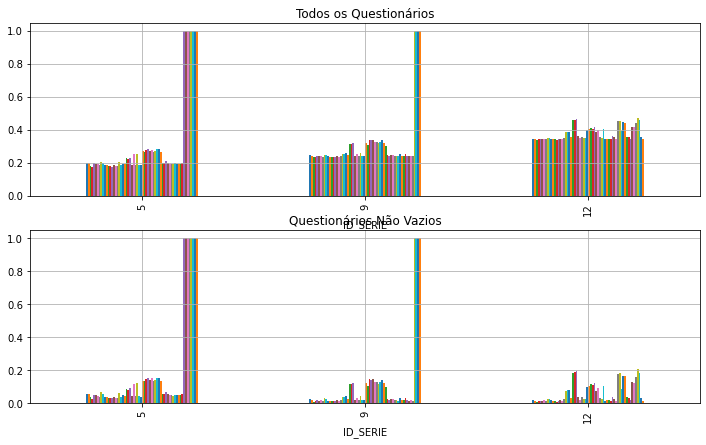

In [10]:
fig, axs = plt.subplots(2,1,figsize=(12,7))
qst_serie_null.groupby('ID_SERIE').mean()[Q_columns].plot.bar(legend=[], ax=axs[0])#.rename(columns={'ID_ALUNO':'N° DE ALUNOS/QUESTIONARIOS'})
qst_serie_null_nao_vazios.groupby('ID_SERIE').mean()[Q_columns].plot.bar(legend=[], ax=axs[1])#.rename(columns={'ID_ALUNO':'N° DE ALUNOS/QUESTIONARIOS'})
[axs[i].set_title(['Todos os Questionários', 'Questionários Não Vazios'][i]) for i in [0,1]]

[axs[i].grid() for i in [0,1]]
plt.show()

### Extraindo:5° e 9° Ano do Fundamental, 3° Ano do Ensino Médio

In [10]:
ano5 = qst_nan[qst_raw['ID_SERIE']==5].dropna(how='all', subset=Q_columns).drop(Q_columns[-8:], axis=1).copy()

In [11]:
ano9 = qst_nan[qst_raw['ID_SERIE']==9].dropna(how='all', subset=Q_columns).drop(Q_columns[-4:], axis=1).copy()

In [12]:
ano3 = qst_nan[qst_raw['ID_SERIE']==12].dropna(how='all', subset=Q_columns).copy()

In [13]:
anos = [ano5, ano9, ano3]

In [14]:
qst_nan = 'vazio'
qst_serie_null = 'Vazio'
qst_serie_null_nao_vazios = 'vazio'

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(16,3))
for i in range(3):

    anos[i].isnull().mean().plot.bar(ax=axs[i])

In [16]:

for i in range(3):
    qsts_completos = len(anos[i].dropna(how='any', subset=Q_columns[ :[-8,-4, len(Q_columns)][i] ]))
    
    print('Questionários ({} Ano)'.format([5,9,3][i]))
    print('Total:', len(anos[i]))
    print('Completos:', qsts_completos)    
    print('Porcentagem:', round(qsts_completos/len(anos[i])*100, 2), '%')
    print('')

Questionários (5 Ano)
Total: 468706
Completos: 146738
Porcentagem: 31.31 %

Questionários (9 Ano)
Total: 360455
Completos: 161356
Porcentagem: 44.76 %

Questionários (3 Ano)
Total: 20117
Completos: 7887
Porcentagem: 39.21 %



# Dados Faltando: Questões sem Resposta

#### Extraindo as colunas de Questões

In [11]:
Q = qst_raw[Q_columns].copy()

In [12]:
Q.shape

(1048575, 62)

In [13]:
Q.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,...,TX_RESP_Q053,TX_RESP_Q054,TX_RESP_Q055,TX_RESP_Q056,TX_RESP_Q057,TX_RESP_Q058,TX_RESP_Q059,TX_RESP_Q060,TX_RESP_Q061,TX_RESP_Q062
0,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
1,A,B,F,E,A,D,A,A,C,A,...,A,B,.,.,.,.,.,.,.,.
2,B,B,F,F,B,A,A,A,A,B,...,A,A,.,.,.,.,.,.,.,.
3,A,B,E,C,A,D,A,C,A,A,...,A,A,.,.,.,.,.,.,.,.
4,A,B,C,D,A,C,A,A,A,A,...,A,A,.,.,.,.,.,.,.,.


In [111]:
Q_nan = Q.replace('.', np.nan)

In [112]:
Q_54 = Q_nan.drop(Q.columns[-8:], axis=1)

In [17]:
Q_54_nao_vazios = Q_54.dropna(how='all')

In [18]:
p_qst_nao_vazios = round(len(Q_54_nao_vazios)/len(Q)*100, 2)
print('Proporção de questionários não vazios (Q1-Q54): ', p_qst_nao_vazios)

Proporção de questionários não vazios (Q1-Q54):  80.99


# Removendo Colunas por Respostas Faltando

In [117]:
p_falt_por_questao_ord = faltando_por_questao_p.sort_values()
n_questoes = len(faltando_por_questao_p)

menos_n_cols = []
for n_cols in range(n_questoes):
    
    n_questoes_restantes = n_questoes-n_cols
    colunas_restantes = p_falt_por_questao_ord.iloc[:n_questoes_restantes].index.tolist()
    max_p_faltando_por_questao = p_falt_por_questao_ord.iloc[n_questoes_restantes-1]
    
    Q_restante = Q_nan[colunas_restantes]
    Q_restante_nao_vazios = Q_restante.dropna(how='all')
    
    p_respostas_faltando = (Q_restante.isnull().sum().sum()) / (Q_restante.size)
    p_respostas_faltando_nao_vazios = (Q_restante_nao_vazios.isnull().sum().sum()) / (Q_restante_nao_vazios.size)
    
    p_questionarios_completos = len(Q_restante.dropna(how='any'))/len(Q)
    p_questionarios_nao_vazios = len(Q_restante_nao_vazios)/len(Q)
    
    menos_n_cols.append([n_cols, n_questoes_restantes, p_respostas_faltando,
                         p_respostas_faltando_nao_vazios, p_questionarios_completos,
                         p_questionarios_nao_vazios, max_p_faltando_por_questao])
    
    clear_output(wait=True)
    print(n_cols, '/', n_questoes)
    
ate_p_faltando_df = pd.DataFrame(menos_n_cols, columns=['menos_n_colunas', 'questoes_restantes', 'p_respostas_faltando',
                                                        'p_respostas_faltando_nao_vazios', 'p_questionarios_completos',
                                                        'p_questionarios_nao_vazios', 'max_p_faltando_por_questao']).set_index('menos_n_colunas')

61 / 62


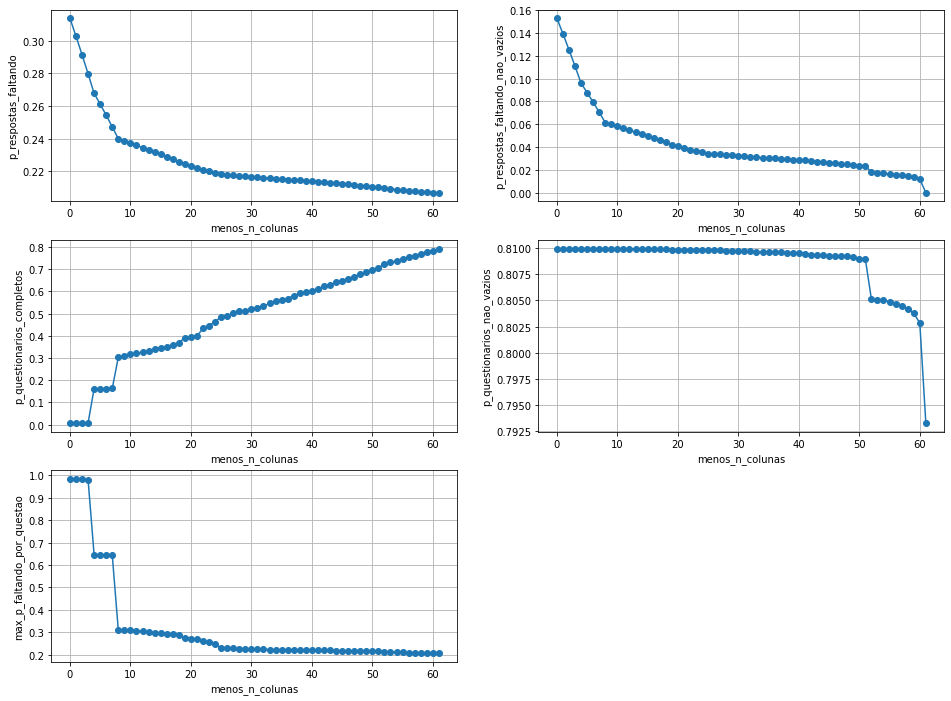

In [123]:
fig = plt.figure(figsize=(16,12))

axs = [fig.add_subplot(3,2,i) for i in range(1,6)]

for i in range(5):
    
    ate_p_faltando_df.iloc[:,i+1].plot(ax=axs[i], marker='o')
    #ate_p_faltando_df.set_index('questoes_restantes').iloc[:,i].plot(ax=axs[i], marker='o')
    
    axs[i].grid()
    axs[i].set_ylabel(ate_p_faltando_df.columns[i+1])

plt.show()

###  Questionários Completos Removendo 8 Questões

In [141]:
Q_54_completos = Q_54.dropna(how='any')

In [126]:
len(Q_54_completos)/len(Q)

0.30374079107359986

In [139]:
print('Number of Questions/Columns Out:', 62-Q_54_completos.columns.size, '/', 62)
print('Number of complete Questionaires: ', len(Q_54_completos))
print('Percentage of Questionaries Left: ', round(len(Q_54_completos)/len(Q)*100,2), '%')

Number of Questions/Columns Out: 8 / 62
Number of complete Questionaires:  318495
Percentage of Questionaries Left:  30.37 %


### Sem Remover Questões

In [134]:
Q_completos = Q_nan.dropna(how='any')

In [140]:
print('Number of Questions/Columns Out:', 62-Q_completos.columns.size, '/', 62)
print('Number of complete Questionaires: ', len(Q_completos))
print('Percentage of Questionaries Left: ', round(len(Q_completos)/len(Q)*100,2), '%')

Number of Questions/Columns Out: 0 / 62
Number of complete Questionaires:  7887
Percentage of Questionaries Left:  0.75 %


# Medindo Quantidade de Questões sem Resposta

### Função

In [15]:
def qsts_sem_resp(qst_df):

    questionarios = len(qst_df)
    questoes = qst_df.size

    questoes_sem_resp = qst_df.isnull().sum().sum()
    questoes_com_resp = questoes - questoes_sem_resp
    p_questoes_sem_resp = questoes_sem_resp / questoes
    p_questoes_com_resp = 1 - p_questoes_sem_resp
    
    sem_resp_por_questionario = qst_df.isnull().sum(axis=1)

    print('Total de Questionários: ', questionarios)
    print('Total Questões: ', questoes)
    print('Questões sem Resposta: ', questoes_sem_resp)
    print('Porcentagem Questões sem Resposta: ', round(p_questoes_sem_resp*100,2), '%')
    print('Questões com Resposta: ', questoes_com_resp)
    print('Porcentagem Questões com Resposta: ', round(p_questoes_com_resp*100,2),'%')
    
    return questionarios, questoes_sem_resp, questoes_com_resp, sem_resp_por_questionario

### 5° Ano

In [19]:
ano5_sem_resp = qsts_sem_resp(ano5)

Total de Questionários:  468706
Total Questões:  32340714
Questões sem Resposta:  1791470
Porcentagem Questões sem Resposta:  5.54 %
Questões com Resposta:  30549244
Porcentagem Questões com Resposta:  94.46 %


### 9° Ano

In [304]:
ano9_sem_resp = qsts_sem_resp(ano9)

Total de Questionários:  360455
Total Questões:  26313215
Questões sem Resposta:  991132
Porcentagem Questões sem Resposta:  3.77 %
Questões com Resposta:  25322083
Porcentagem Questões com Resposta:  96.23 %


### 3° Ano

In [306]:
ano3_sem_resp = qsts_sem_resp(ano3)

Total de Questionários:  20117
Total Questões:  1549009
Questões sem Resposta:  79841
Porcentagem Questões sem Resposta:  5.15 %
Questões com Resposta:  1469168
Porcentagem Questões com Resposta:  94.85 %


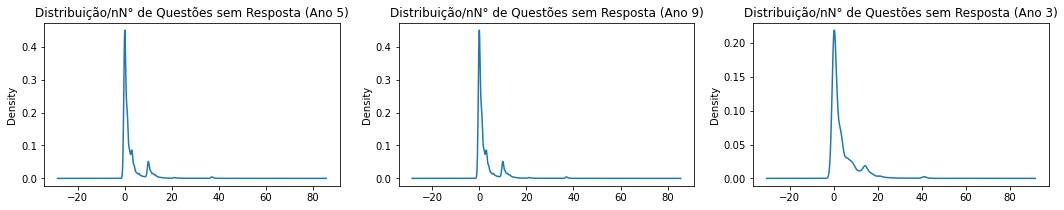

In [340]:
fig, axs = plt.subplots(1,3,figsize=(18,3))
    
ano5_sem_resp.plot.kde(ax=axs[0])
ano9_sem_resp.plot.kde(ax=axs[1])
ano3_sem_resp.plot.kde(ax=axs[2])

[axs[i].set_title('Distribuição/nN° de Questões sem Resposta (Ano {})'.format([5,9,3][i])) for i in [0,1,2]]

plt.show()

# Medindo Quantidade de Questões sem Resposta Eliminando Linhas

### Função 2

In [16]:
def missing_stats(qsts_df):
    
    questionarios, questoes_sem_resp, questoes_com_resp, sem_resp_por_questionario = qsts_sem_resp(qsts_df)

    n_questoes = len(qsts_df.columns[15:])

    stts = []
    for sem_n_resp in range(n_questoes+1):

        clear_output(wait=True)
        print(sem_n_resp, '/ {} '.format(n_questoes))

        p_qsts_faltando_n = sum(sem_resp_por_questionario == sem_n_resp) / questionarios    
        qsts_faltando_ate_n = (sem_resp_por_questionario <= sem_n_resp)
        p_qsts_faltando_ate_n = sum(qsts_faltando_ate_n) / questionarios

        qsts_df_n = qsts_df[qsts_faltando_ate_n]

        questoes_restantes = qsts_df_n.size
        questoes_sem_resposta_restantes = qsts_df_n.isnull().sum().sum()

        p_questoes_sem_resposta_restantes = questoes_sem_resposta_restantes / questoes_restantes

        p_questoes_sem_resposta_ttl_restantes = questoes_sem_resposta_restantes / questoes_sem_resp
        p_questoes_com_resposta_ttl_restantes = (questoes_restantes - questoes_sem_resposta_restantes) / questoes_com_resp

        stts.append([sem_n_resp,
                     p_qsts_faltando_n, p_qsts_faltando_ate_n, 1-p_qsts_faltando_ate_n,
                     questoes_sem_resposta_restantes, p_questoes_sem_resposta_restantes,
                     p_questoes_sem_resposta_ttl_restantes, p_questoes_com_resposta_ttl_restantes])

    stts_df = pd.DataFrame(stts, columns=['sem_n_respostas',
                                               'p_qsts_faltando_n', 'p_qsts_faltando_ate_n', 'p_qsts_faltando_mais_que_n',
                                               'questoes_restantes_sem_resposta', 'p_questoes_sem_resposta_restantes',
                                               'p_questoes_sem_resposta_ttl_restantes', 'p_questoes_com_resposta_ttl_restantes']).set_index('sem_n_respostas')
    print('Done!')
    
    return stts_df

In [319]:
ano5_stats = missing_stats(ano5)

ano9_stats = missing_stats(ano9)

ano3_stats = missing_stats(ano3)

### 5° Ano

In [331]:
stts_df = ano5_stats
stts_cols = stts_df.columns.tolist()

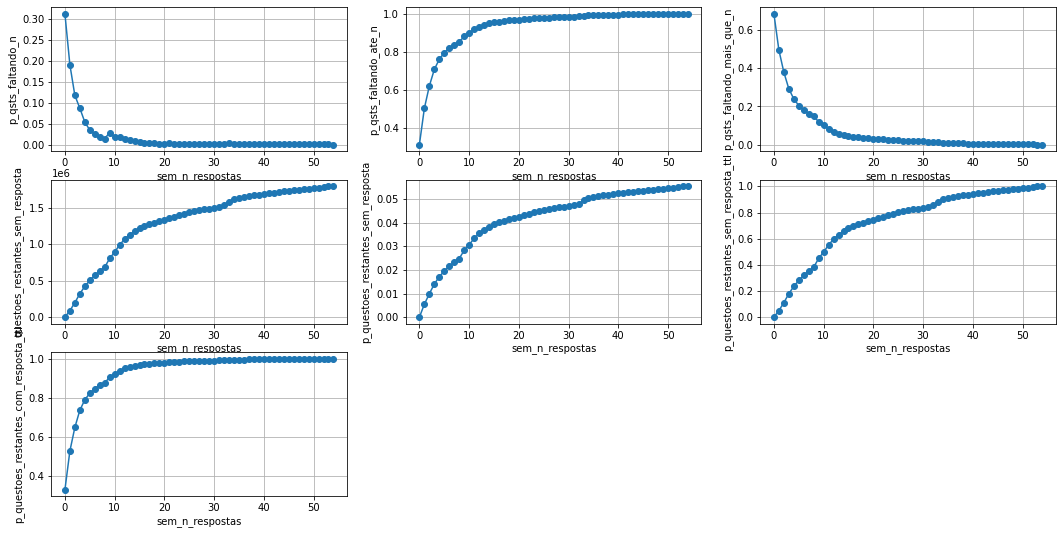

In [332]:
fig = plt.figure(figsize=(18,9))
axs = [fig.add_subplot(3,3,i) for i in range(1,8)]

for i, col in zip(range(8), stts_df.columns):
    
    stts_df.iloc[:, i].plot(ax=axs[i], marker='o')    
    axs[i].grid()
    axs[i].set(ylabel=col)
plt.show()

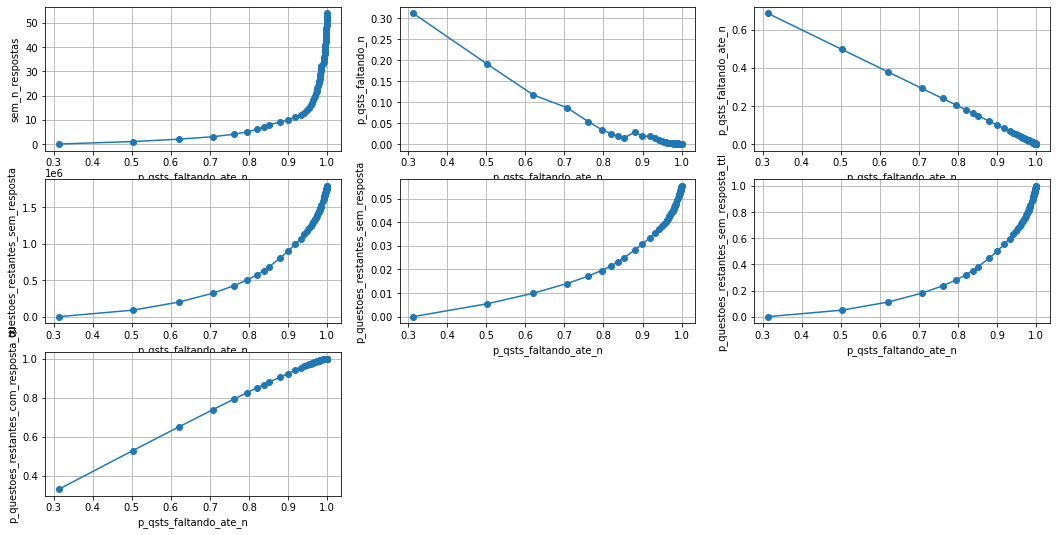

In [333]:
fig = plt.figure(figsize=(18,9))

axs = [fig.add_subplot(3,3,i) for i in range(1,8)]

for i, col in zip(range(8), stts_df.reset_index().set_index(stts_cols[2]).columns):
    
    stts_df.reset_index().set_index(stts_cols[1]).iloc[:, i].plot(ax=axs[i], marker='o')    
    axs[i].grid()
    axs[i].set(ylabel=col)
plt.show()

### 9° Ano

In [336]:
stts_df = ano9_stats
stts_cols = stts_df.columns.tolist()

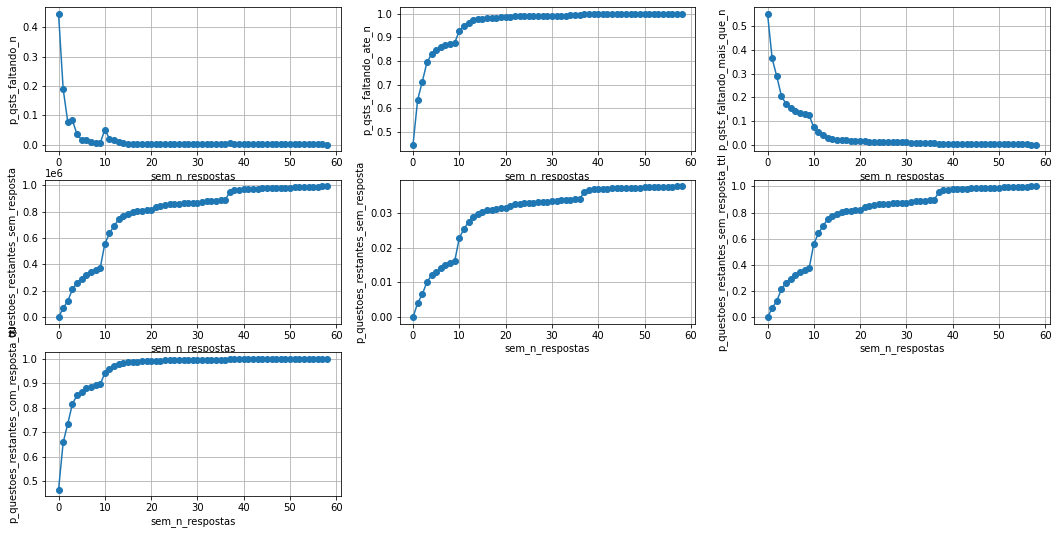

In [337]:
fig = plt.figure(figsize=(18,9))
axs = [fig.add_subplot(3,3,i) for i in range(1,8)]

for i, col in zip(range(8), stts_df.columns):
    
    stts_df.iloc[:, i].plot(ax=axs[i], marker='o')    
    axs[i].grid()
    axs[i].set(ylabel=col)
plt.show()

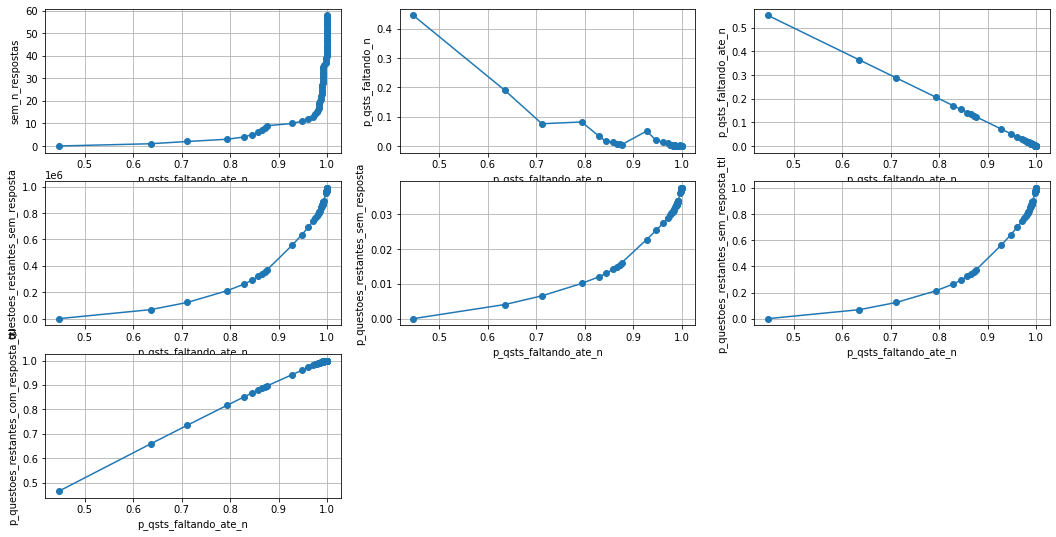

In [338]:
fig = plt.figure(figsize=(18,9))

axs = [fig.add_subplot(3,3,i) for i in range(1,8)]

for i, col in zip(range(8), stts_df.reset_index().set_index(stts_cols[2]).columns):
    
    stts_df.reset_index().set_index(stts_cols[1]).iloc[:, i].plot(ax=axs[i], marker='o')    
    axs[i].grid()
    axs[i].set(ylabel=col)
plt.show()

### 3° Ano

In [322]:
stts_df = ano3_stats
stts_cols = stts_df.columns.tolist()

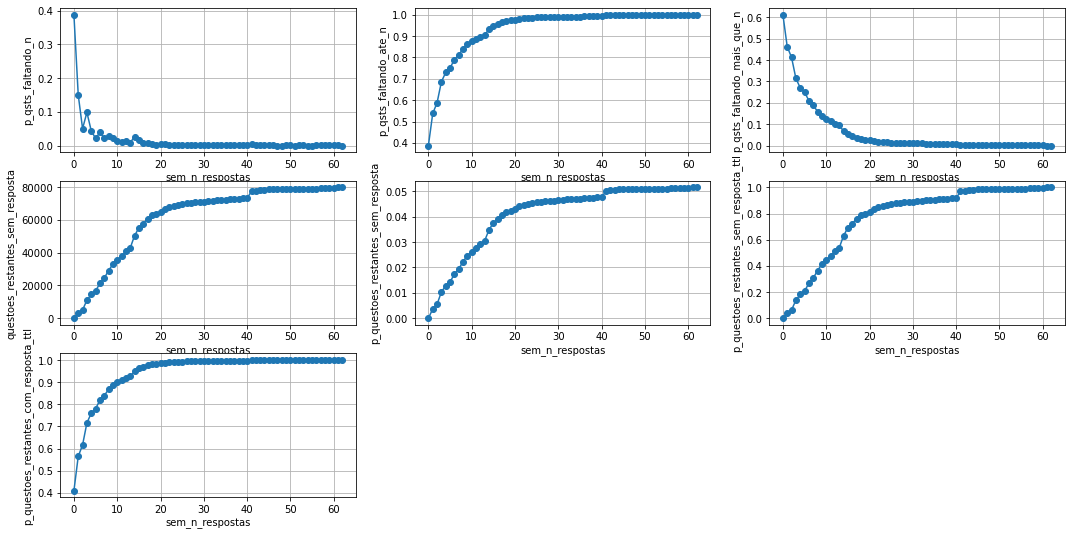

In [326]:
fig = plt.figure(figsize=(18,9))

axs = [fig.add_subplot(3,3,i) for i in range(1,8)]

for i, col in zip(range(8), stts_df.columns):
    
    stts_df.iloc[:, i].plot(ax=axs[i], marker='o')    
    axs[i].grid()
    axs[i].set(ylabel=col)
plt.show()

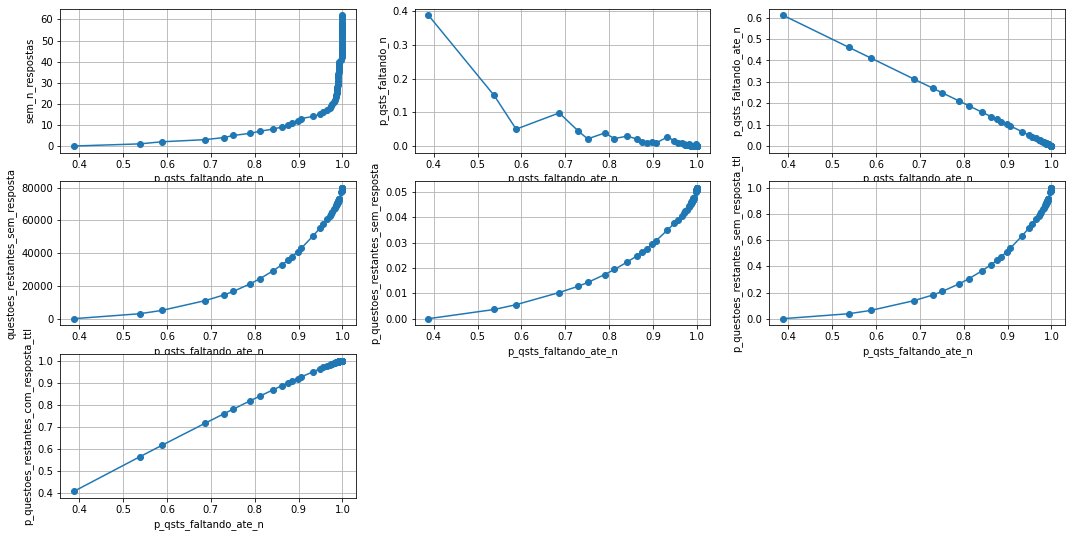

In [327]:
fig = plt.figure(figsize=(18,9))

axs = [fig.add_subplot(3,3,i) for i in range(1,8)]

for i, col in zip(range(8), stts_df.reset_index().set_index(stts_cols[2]).columns):
    
    stts_df.reset_index().set_index(stts_cols[1]).iloc[:, i].plot(ax=axs[i], marker='o')    
    axs[i].grid()
    axs[i].set(ylabel=col)
plt.show()

# Classification

### Importing

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as TREE
from sklearn.linear_model import LogisticRegression as LogReg, SGDClassifier as SGDC
from sklearn.svm import SVC

In [16]:
from sklearn.ensemble import BaggingClassifier as BGG, RandomForestClassifier as RFC, ExtraTreesClassifier as ETC, StackingClassifier as STCK, GradientBoostingClassifier as GBC, AdaBoostClassifier as ABC, VotingClassifier as Voting

In [17]:
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn.metrics import accuracy_score as acc_scr, classification_report as cr, confusion_matrix as cm, make_scorer
scorer = make_scorer(acc_scr)

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit as sss

### Setting Models

In [19]:
simple_models = [KNN(), TREE(), LogReg(), SVC(), SGDC()]
ensemble_models = [BGG(), RFC(), ETC(), GBC(), ABC()]

simple_models_names = ['KNN', 'TREE', 'LogReg', 'SVC', 'SGDC']
ensemble_models_names = ['BGG', 'RFC', 'ETC', 'GBC', 'ABC']
votings_names = ['simple_voting', 'ensemble_voting', 'simple_stacking', 'ensemble_stacking']

feat_imp_names = ['TREE', 'RFC', 'ETC', 'GBC', 'ABC']

In [23]:
votings = [Voting([(simple_models_names[i], simple_models[i]) for i in range(5)]),
           Voting([(ensemble_models_names[i], ensemble_models[i]) for i in range(5)]),
           STCK([(simple_models_names[i], simple_models[i]) for i in range(5)]),
           STCK([(ensemble_models_names[i], ensemble_models[i]) for i in range(5)])
          ]

In [20]:
models = simple_models + ensemble_models# + votings
models_names = simple_models_names + ensemble_models_names# + votings_names

# Function to Score Multiple Models

In [ ]:
def score_models(df, target, models, names, method='accuracy', return_importances=True, test_size=0.2):
    
    feat_imp_names = ['TREE', 'RFC', 'ETC', 'GBC', 'ABC']
    scorer = make_scorer(acc_scr)
    
    print('Extraindo variáveis independentes e variável dependente.')
    
    y = df[target].copy()
    x = df.drop(target, axis=1).copy()
    
    if method=='accuracy':
        print('Dividindo variáveis em amostras de treinamento e de teste...')
        msk = np.random.rand(len(y))<(1-test_size)
        x_train, y_train, x_test, y_test = x[msk], y[msk], x[~msk], y[~msk]

#-----------------------------------------------------------------

    cnt = 0
    feat_imps = []
    scrs = []
    
    for model, name in zip(models, names):

        if method=='cross_validation':
            
            scr = cross_val_score(model, x, y, scoring=scorer)
            scrs.append([np.mean(scr), np.std(scr)])

        else:

            model_fitted = model.fit(x_train, y_train)
            scr = scorer(model_fitted, x_test, y_test)                
            scrs.append([scr])
            
        if return_importances:
            clear_output(wait=True)
            print(name, ' ({}/{})'.format(cnt, len(names)), '  -  Fitting Model ')
            
            if name in feat_imp_names:    
                feat_imps.append(model.fit(x,y).feature_importances_.tolist())

        cnt+=1
        clear_output(wait=True)
        print(name, ' ({}/{})'.format(cnt, len(names)))
        
 #----------------------------------------------------------
    
    print('Converting scores dataframe...')
    if method=='cross_validation':
        scrs_df = pd.DataFrame(scrs, columns=['avg_acc', 'std_acc'], index=names)
    else:
        scrs_df = pd.DataFrame(scrs, columns=['acc'], index=names)
    
    if return_importances:
        print('Converting feature importances dataframe...')
        feat_imps_df = pd.DataFrame(feat_imps, columns=x.columns.tolist(), index=[name for name in names if name in feat_imp_names]).astype(float)
        print('Done!')
        return scrs_df, feat_imps_df
    
    else:
        print('Done!')
        return scrs_df


In [21]:
targets_names = ['Sexo', 'Auto Declaração', 'Trabalho Doméstico', 'Trabalho Fora de Casa', 'Reprovado', 'Abandono']

### 5° Ano

In [22]:
targets = ['TX_RESP_Q001', 'TX_RESP_Q002', 'TX_RESP_Q044', 'TX_RESP_Q045', 'TX_RESP_Q048', 'TX_RESP_Q049']
i=-1

### 9° Ano

In [349]:
targets = ['TX_RESP_Q001', 'TX_RESP_Q002', 'TX_RESP_Q045', 'TX_RESP_Q046', 'TX_RESP_Q049', 'TX_RESP_Q050', 'TX_RESP_Q058']
targets_names = ['Sexo', 'Auto Declaração', 'Trabalho Doméstico', 'Trabalho Fora de Casa', 'Reprovado', 'Abandono', 'Pretende']
i=-1

### 3° Ano

In [28]:
targets = ['TX_RESP_Q001', 'TX_RESP_Q002', 'TX_RESP_Q039', 'TX_RESP_Q040', 'TX_RESP_Q043', 'TX_RESP_Q044']
i=-1

# Dictionary for Categories

In [23]:
dict_5ano = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Personal Work\Data Frames\Source\saep\dicionários quest. alunos\dicionario 5ano.csv').set_index('questão')
dict_9ano = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Personal Work\Data Frames\Source\saep\dicionários quest. alunos\dicionario 9ano.csv').set_index('questão')
dict_3ano = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Personal Work\Data Frames\Source\saep\dicionários quest. alunos\dicionario 3ano.csv').set_index('questão')


In [24]:
dict_9ano.loc[targets[0]].head()

Enunciado          Sexo
A            Masculino.
B             Feminino.
C                   NaN
D                   NaN
Name: TX_RESP_Q001, dtype: object

### Checando

In [25]:
i=-1

In [31]:
i+=1
print(i, targets_names[i])
print(targets[i])

5 Abandono
TX_RESP_Q049


# Scoring as the sample size increases

### Extraindo amostras

In [72]:
ano5_lite = ano5.dropna(how='any').sample(50000)
ano9_lite = ano9.dropna(how='any').sample(50000)
ano3_lite = ano3.dropna(how='any')

### Especifico para Abandono

In [66]:
ano5_lite = ano5.dropna(how='any').replace(np.nan, 'Z').astype(str)

ano5_lite = pd.concat([ano5_lite[ano5_lite[targets[1]]=='B'].sample(30000),
                       ano5_lite[ano5_lite[targets[1]]!='B']], axis=0)

In [74]:
ano9_lite = ano9.dropna(how='any').replace(np.nan, 'Z').astype(str)

In [78]:
ano9_lite = pd.concat([ano9_lite[ano9_lite[targets[5]]=='A'].sample(40000),
                       ano9_lite[ano9_lite[targets[5]]!='A']], axis=0)

In [371]:
ano9_lite = ano9.dropna(how='all').sample(10000)
ano3_lite = ano3.dropna(how='all')

In [79]:
ano9_lite.groupby(targets[5]).count().iloc[:,0]

TX_RESP_Q049
A    40000
B    40605
C    16221
Name: ID_SAEB, dtype: int64

In [67]:
ano5_lite.groupby(targets[1]).count().iloc[:,0]

TX_RESP_Q002
A    28678
B    30000
C    11882
D     3124
E     3439
F    16610
Name: ID_SAEB, dtype: int64

### Label Encoding

In [ ]:
for col in ano5_lite.columns:
    ano5_lite[col] = LE().fit(ano5_lite[col]).transform(ano5_lite[col])

In [80]:
for col in ano9_lite.columns:
    ano9_lite[col] = LE().fit(ano9_lite[col]).transform(ano9_lite[col])

In [372]:
for col in ano3_lite.columns:
    ano3_lite[col] = LE().fit(ano3_lite[col]).transform(ano3_lite[col])

<ipython-input-372-df38e9057e57>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano3_lite[col] = LE().fit(ano3_lite[col]).transform(ano3_lite[col])


In [416]:
targets_names[5]

'Abandono'

In [49]:
ano5_lite[targets[5]].value_counts()

0    10000
1     8625
2     2447
Name: TX_RESP_Q049, dtype: int64

### Function

In [40]:
def score_models(df, target, models, models_names, test_size):

    feat_imp_names = ['TREE', 'RFC', 'ETC', 'GBC', 'ABC']
    
    print('Extraindo variáveis independentes e variável dependente...')
    
    y = df[target].copy()
    x = df.drop(target, axis=1).copy()
    
    print('Dividindo amostras de teste e de treinamento...')

    msk = np.random.rand(len(y))<(1-test_size)
    x_train, y_train, x_test, y_test = x[msk], y[msk], x[~msk], y[~msk]
    
#---------------

    n_models = len(models_names)
    scrs = []
    for i in range(n_models):
        
        clear_output(wait=True)
        print('Model {} ({}/{}) Fitting...'.format(models_names[i], i+1, n_models))
        fitted_model =  models[i].fit(x_train, y_train)

        print('Predicting...'.format(models_names[i], i+1, n_models))        
        y_pred = fitted_model.predict(x_test)
        
        print('Scoring...'.format(models_names[i], i+1, n_models))
        scr = acc_scr(y_test, y_pred)
       
        scrs.append(scr)
        
    scrs_df = pd.DataFrame(scrs, columns=['acc'], index=models_names)
    return scrs_df


## Chamando Função de Avaliação

In [83]:
ano5_lite_scrs = score_models(ano9_lite, targets[5], ensemble_models, ensemble_models, 0.2)

Model AdaBoostClassifier() (5/5) Fitting...
Predicting...
Scoring...


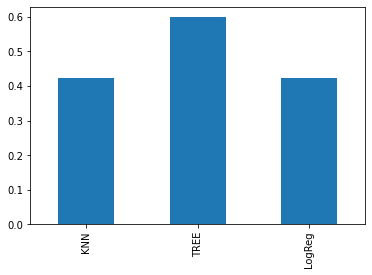

In [82]:
ano5_lite_scrs['acc'].plot.bar()

In [202]:
def score_prog(df, target, models, models_names, bins=5, prog_degree=1, test_size=0.2):

    len_df = len(df)
    steps = [int(step) for step in ((np.linspace(0, 1, bins+1)**prog_degree)*len_df)[1:]]
    
    prog_scrs = []
    for sample_size in steps:

        df_sample = df.sample(sample_size)
        sample_scr = score_models(df_sample, target, models, models_names, test_size)

        prog_scrs.append(sample_scr.T)

    prog_scrs_df = pd.concat(prog_scrs, axis=0)
    prog_scrs_df.index=[i/len_df for i in steps]
    
    return prog_scrs_df

In [241]:
ano5_lite = ano5_comp.sample(30000)

In [242]:
ano5_prog = score_prog(ano5_lite, targets[3], models, models_names, bins=20, prog_degree=2)

Model ABC (10/10) Fitting...
Predicting...
Scoring...


(0.0, 0.2)

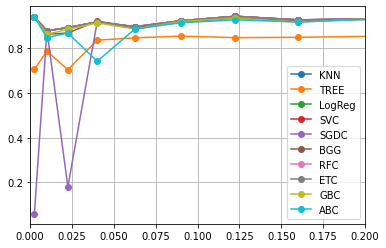

In [244]:
ano5_prog.plot(marker='o')
plt.grid()
plt.xlim(0,0.2)

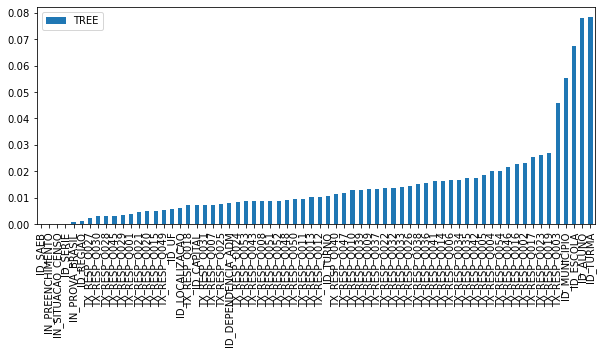

In [463]:
ano5_feat_imps.T.sort_values('TREE').plot.bar(figsize=(10,4))

## Accuracy Evaluation

In [705]:
scrs_df = pd.DataFrame(scrs, columns=['model_name', 'avg_acc', 'std_acc']).set_index('model_name')

scrs_df['model_type'] = ['simple']*5+['ensemble']*5+['voting']*4

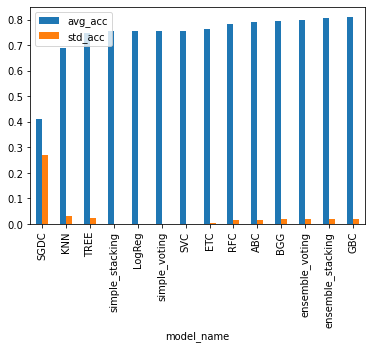

In [708]:
scrs_df.sort_values('avg_acc').plot.bar()

In [709]:
scrs_df.groupby('model_type').agg([np.mean])

,avg_acc,std_acc
,mean,mean
model_type,,
ensemble,0.788702,0.015236
simple,0.671141,0.064890
voting,0.778666,0.010531


## Feature Importances Visual Analysis

In [689]:
feat_imps_df = pd.DataFrame(np.array(feat_imps).T, columns=['feature']+feat_imp_names).set_index('feature').astype(float)

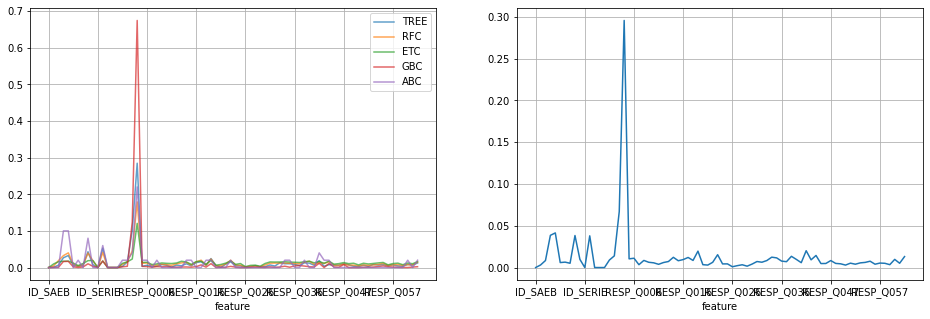

In [690]:
fig, axs = plt.subplots(1,2,figsize=(16,5))

feat_imps_df.plot(alpha=0.7, ax=axs[0])
feat_imps_df.mean(axis=1).plot(ax=axs[1])

[axs[i].grid() for i in [0,1]]

plt.show()

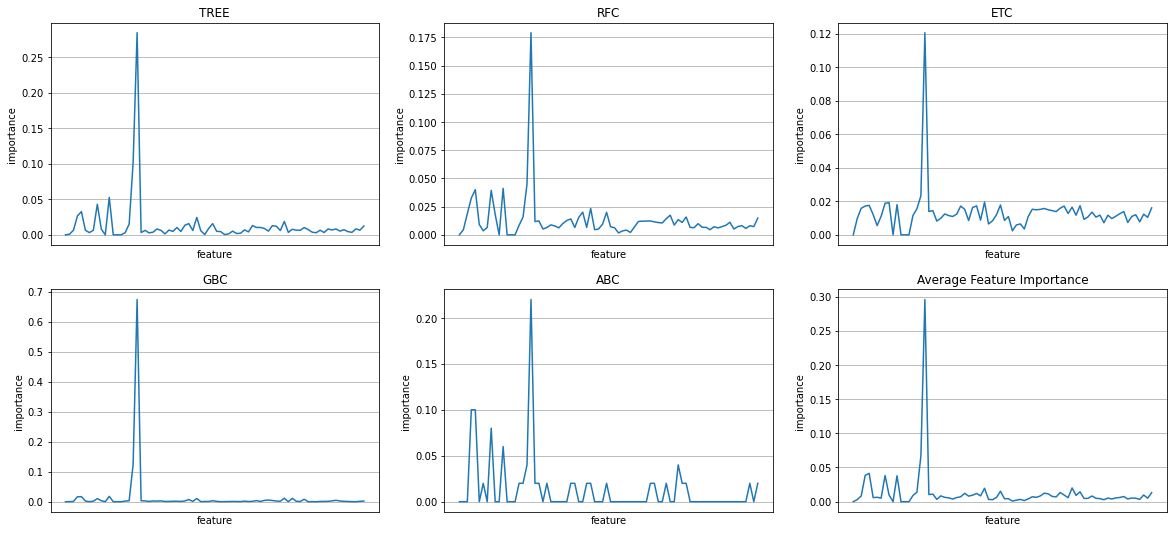

In [691]:
fig = plt.figure(figsize=(20,9))
axs = [fig.add_subplot(2,3,i) for i in range(1,7)]

features = feat_imps_df.index
for i, col in enumerate(feat_imps_df):
    feat_imps_df[col].plot(ax=axs[i])
    axs[i].grid()
    axs[i].set(xticks=[],
               title=col,
               ylabel='importance')

feat_imps_df.mean(axis=1).plot(ax=axs[5])
axs[5].grid()
axs[5].set(xticks=[],
           title='Average Feature Importance',
           ylabel='importance')
    
plt.show()

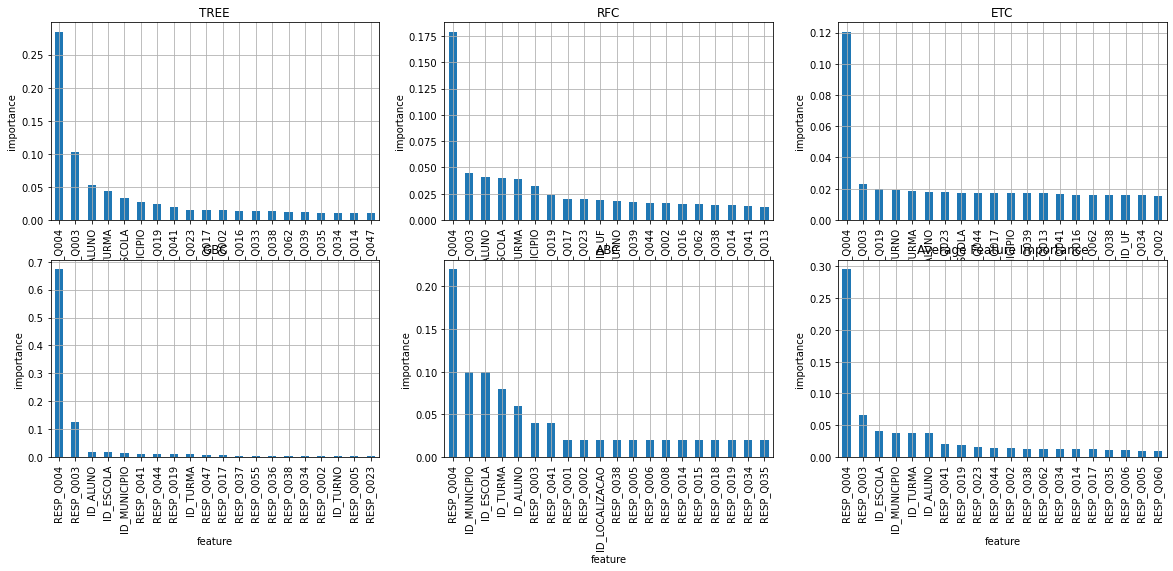

In [692]:
fig = plt.figure(figsize=(20,8))
axs = [fig.add_subplot(2,3,i) for i in range(1,7)]

features = feat_imps_df.index
for i, col in enumerate(feat_imps_df):
    feat_imps_df[col].sort_values(ascending=False).head(20).plot.bar(ax=axs[i])
    axs[i].grid()
    axs[i].set(title=col, ylabel='importance')
    
feat_imps_df.mean(axis=1).sort_values(ascending=False).head(20).plot.bar(axs[5])
axs[5].grid()
axs[5].set(title='Average Feature Importance', ylabel='importance')
    
plt.show()

In [602]:
from functools import reduce

In [623]:
len(x.columns)

76

In [693]:
top_feats = []
for n_top_features in range(1,76):

    features_topn = {}
    for i, col in enumerate(feat_imps_df):
        features_topn[col] = feat_imps_df[col].sort_values(ascending=False).head(n_top_features).index.tolist()
        
    unique_features = np.unique(list(features_topn.values()))
    n_unique_features = len(unique_features)
    intersection_features = list(reduce(set.intersection, [set(lst) for lst in list(features_topn.values())]))
    n_intersection_features = len(intersection_features)
    
    top_feats.append([n_top_features, n_unique_features, n_intersection_features, unique_features, intersection_features])
    
    clear_output(wait=True)
    print(n_top_features, '/', 20)
    
top_feats_df = pd.DataFrame(top_feats, columns=['n_top_features', 'n_unique_features', 'n_intersection_features', 'unique_features', 'intersection_features'])

75 / 20


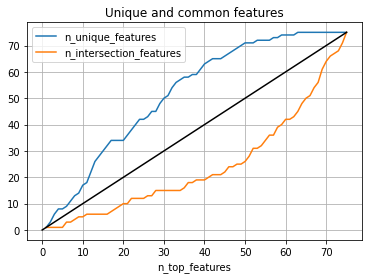

In [695]:
top_feats_df.set_index('n_top_features').iloc[:, :2].plot()
plt.plot(range(76), range(76), color='black')

#plt.xlim(0,35)
#plt.ylim(0,35)
plt.grid()
plt.title('Unique and common features')

plt.show()

In [696]:
top10_intersection = top_feats_df.set_index('n_top_features').loc[33, 'intersection_features']

top10_avg = feat_imps_df.mean(axis=1).sort_values(ascending=False).head(12).index.tolist()

In [697]:
sorted(top10_intersection)

['ID_ALUNO',
 'ID_ESCOLA',
 'ID_MUNICIPIO',
 'ID_TURMA',
 'RESP_Q002',
 'RESP_Q003',
 'RESP_Q004',
 'RESP_Q019',
 'RESP_Q023',
 'RESP_Q034',
 'RESP_Q038',
 'RESP_Q039',
 'RESP_Q041',
 'RESP_Q044',
 'RESP_Q062']

In [698]:
sorted(top10_avg)

['ID_ALUNO',
 'ID_ESCOLA',
 'ID_MUNICIPIO',
 'ID_TURMA',
 'RESP_Q002',
 'RESP_Q003',
 'RESP_Q004',
 'RESP_Q019',
 'RESP_Q023',
 'RESP_Q038',
 'RESP_Q041',
 'RESP_Q044']

### Nascimento x Reprovação

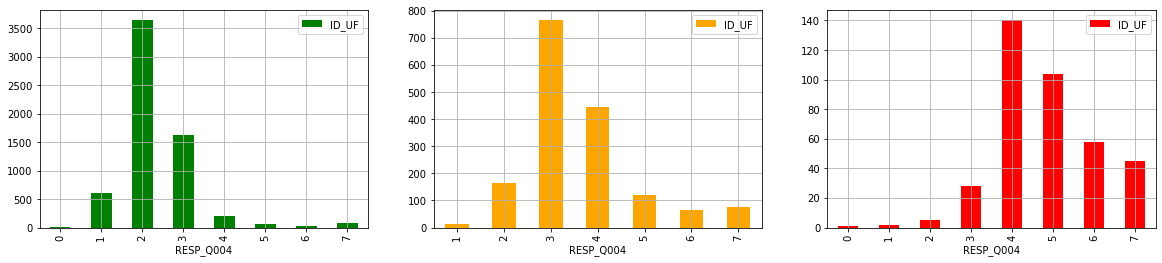

In [710]:
fig, axs = plt.subplots(1,3,figsize=(20,4))

for i, color in enumerate(['green', 'orange', 'red']):
    
    qst_medio.groupby(['RESP_Q004', 'RESP_Q043']).count().reset_index().set_index('RESP_Q043').loc[i].plot.bar(x='RESP_Q004', y='ID_UF', ax=axs[i], color=color)
    axs[i].grid()

### Nacimento x Abandono

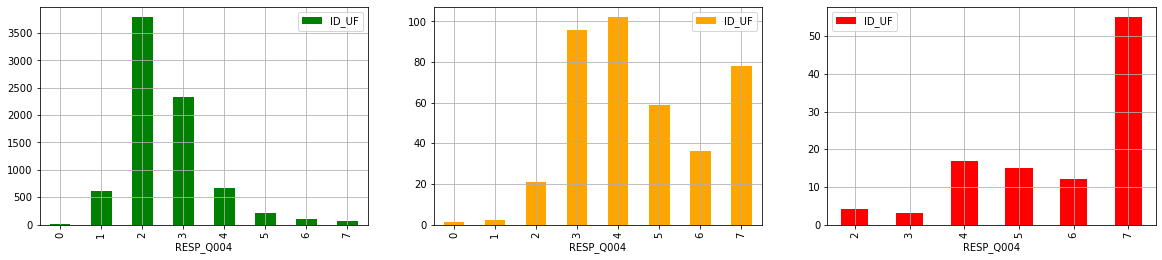

In [711]:
fig, axs = plt.subplots(1,3,figsize=(20,4))

for i, color in enumerate(['green', 'orange', 'red']):
    
    qst_medio.groupby(['RESP_Q004', 'RESP_Q044']).count().reset_index().set_index('RESP_Q044').loc[i].plot.bar(x='RESP_Q004', y='ID_UF', ax=axs[i], color=color)
    axs[i].grid()

### Mês de Nascimento x Reprovação

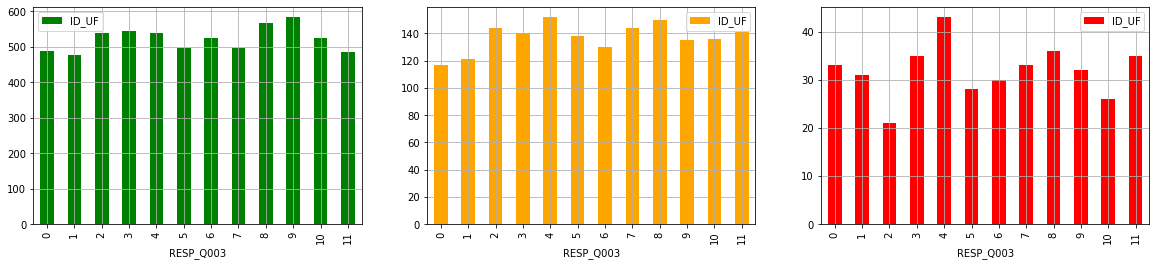

In [712]:
fig, axs = plt.subplots(1,3,figsize=(20,4))

for i, color in enumerate(['green', 'orange', 'red']):
    
    qst_medio.groupby(['RESP_Q003', 'RESP_Q043']).count().reset_index().set_index('RESP_Q043').loc[i].plot.bar(x='RESP_Q003', y='ID_UF', ax=axs[i], color=color)
    axs[i].grid()

### Mês de Nacimento x Abandono

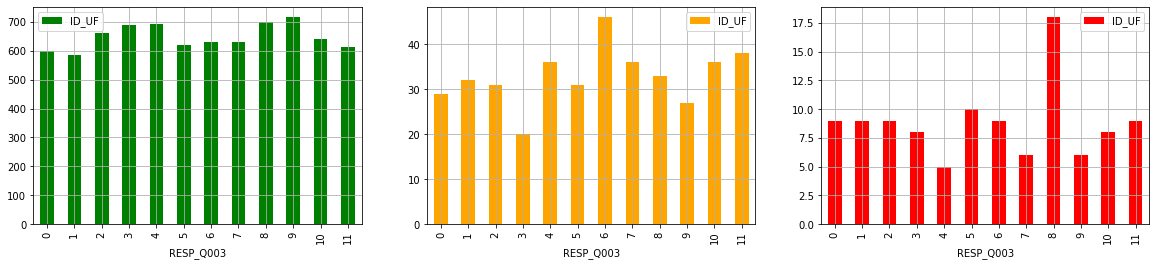

In [713]:
fig, axs = plt.subplots(1,3,figsize=(20,4))

for i, color in enumerate(['green', 'orange', 'red']):
    
    qst_medio.groupby(['RESP_Q003', 'RESP_Q044']).count().reset_index().set_index('RESP_Q044').loc[i].plot.bar(x='RESP_Q003', y='ID_UF', ax=axs[i], color=color)
    axs[i].grid()